In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
df = pd.read_csv('data/dataset_full_pre_text.csv', nrows=500)
df.shape

(500, 6)

In [3]:
del df['Unnamed: 0']
del df['Link']
del df['Bookshelf']
df

,Title,Author,Text
0,"Birds, Illustrated","Color Photography, Vol. 1, No. 1 Various","BIRDS, ILLUSTRATED BY COLOR PHOTOGRAPHY, VOL. ..."
1,Artistic Anatomy of Animals,Édouard Cuyer,ARTISTIC ANATOMY OF ANIMALS *** Produced by Ch...
2,What Bird is That?,Frank M. Chapman,WHAT BIRD IS THAT? *** Produced by Chris Curno...
3,Fox Trapping: A Book of Instruction Telling Ho...,NaN,FOX TRAPPING: A BOOK OF INSTRUCTION TELLING HO...
4,On Snake-Poison: Its Action and Its Antidote,A. Mueller,ON SNAKE-POISON: ITS ACTION AND ITS ANTIDOTE *...
...,...,...,...
495,The Works of Horace,Horace,THE WORKS OF HORACE *** Produced by Juliet Sut...
496,Treatises on Friendship and Old Age,Marcus Tullius Cicero,TREATISES ON FRIENDSHIP AND OLD AGE *** Produc...
497,The Aeneid of Virgil,Virgil,THE AENEID OF VIRGIL *** Transcriber's note: N...
498,The Iliad of Homer (1873),Homer,"THE ILIAD *** THE ILIAD OF HOMER, Literally Tr..."


In [7]:
df_ = df[df['Author']!= 'Various']
df_ = df_[df_['Author']!= 'Anonymous']
df_ = df_[df_['Author']!= 'Various Authors']
df_ = df_[df_['Author']!= 'Unknown']
df_

,Title,Author,Text
0,"Birds, Illustrated","Color Photography, Vol. 1, No. 1 Various","BIRDS, ILLUSTRATED BY COLOR PHOTOGRAPHY, VOL. ..."
1,Artistic Anatomy of Animals,Édouard Cuyer,ARTISTIC ANATOMY OF ANIMALS *** Produced by Ch...
2,What Bird is That?,Frank M. Chapman,WHAT BIRD IS THAT? *** Produced by Chris Curno...
3,Fox Trapping: A Book of Instruction Telling Ho...,NaN,FOX TRAPPING: A BOOK OF INSTRUCTION TELLING HO...
4,On Snake-Poison: Its Action and Its Antidote,A. Mueller,ON SNAKE-POISON: ITS ACTION AND ITS ANTIDOTE *...
...,...,...,...
495,The Works of Horace,Horace,THE WORKS OF HORACE *** Produced by Juliet Sut...
496,Treatises on Friendship and Old Age,Marcus Tullius Cicero,TREATISES ON FRIENDSHIP AND OLD AGE *** Produc...
497,The Aeneid of Virgil,Virgil,THE AENEID OF VIRGIL *** Transcriber's note: N...
498,The Iliad of Homer (1873),Homer,"THE ILIAD *** THE ILIAD OF HOMER, Literally Tr..."


In [8]:
df_ = df_[~df_['Author'].isna()]
df_.shape

(472, 3)

In [10]:
df_ = df_.drop_duplicates(subset=['Text'], keep='first')
df_.shape

(429, 3)

In [13]:
df_

,Title,Author,Text
0,"Birds, Illustrated","Color Photography, Vol. 1, No. 1 Various","BIRDS, ILLUSTRATED BY COLOR PHOTOGRAPHY, VOL. ..."
1,Artistic Anatomy of Animals,Édouard Cuyer,ARTISTIC ANATOMY OF ANIMALS *** Produced by Ch...
2,What Bird is That?,Frank M. Chapman,WHAT BIRD IS THAT? *** Produced by Chris Curno...
4,On Snake-Poison: Its Action and Its Antidote,A. Mueller,ON SNAKE-POISON: ITS ACTION AND ITS ANTIDOTE *...
5,Deadfalls and Snares,A. R. Harding,DEADFALLS AND SNARES *** Produced by Linda M. ...
...,...,...,...
495,The Works of Horace,Horace,THE WORKS OF HORACE *** Produced by Juliet Sut...
496,Treatises on Friendship and Old Age,Marcus Tullius Cicero,TREATISES ON FRIENDSHIP AND OLD AGE *** Produc...
497,The Aeneid of Virgil,Virgil,THE AENEID OF VIRGIL *** Transcriber's note: N...
498,The Iliad of Homer (1873),Homer,"THE ILIAD *** THE ILIAD OF HOMER, Literally Tr..."


320


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


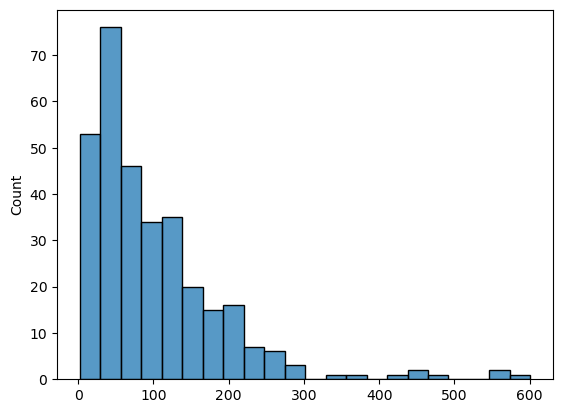

In [27]:
import re
def middle_sentences(text):
    text = str(text)
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    sentences = sentences[int(len(sentences)/3):]
    return sentences

example_text = df_['Text'].iloc[0]
example_sentences = middle_sentences(example_text)
print(len(example_sentences))
sentence_lengths = [len(sentence) for sentence in example_sentences]
sns.histplot(sentence_lengths)
plt.show()

In [28]:
np.mean(sentence_lengths)

100.790625

In [29]:
from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token

/opt/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


'</s>'

320


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


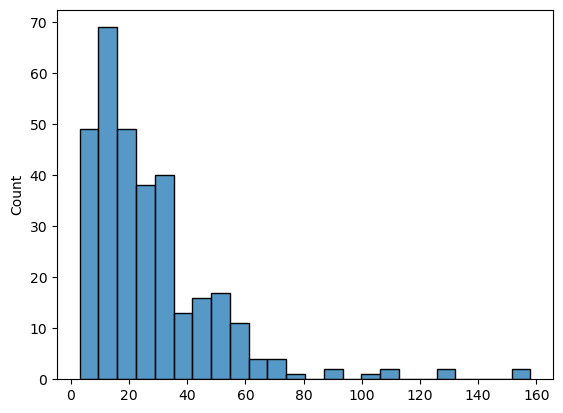

27.35625


In [30]:
tokenized_sentences = [tokenizer.encode(sentence) for sentence in example_sentences]
print(len(tokenized_sentences))
sns.histplot([len(sentence) for sentence in tokenized_sentences])
plt.show()
print(np.mean([len(sentence) for sentence in tokenized_sentences]))

In [32]:
sentences_ = []
for text in df_['Text']:
    sentences = middle_sentences(text)
    sentences_.append(sentences)
len(sentences_)

429

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


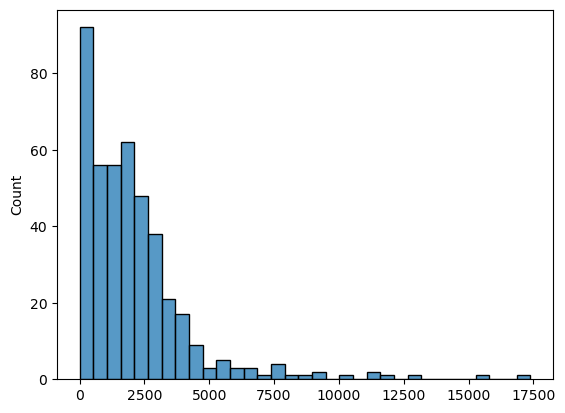

2094.6270396270397


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


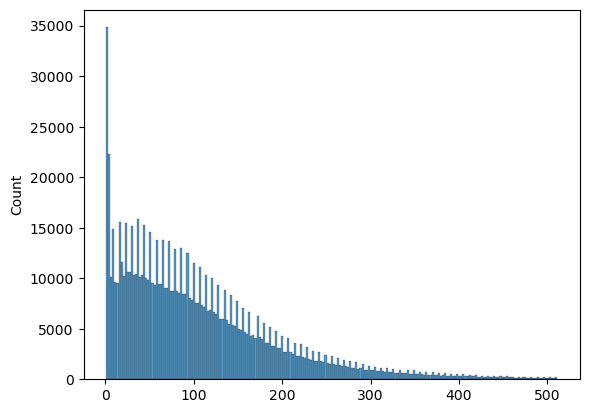

106.57391587797585 85.0 1 511


In [40]:
number_sentences = [len(sentences) for sentences in sentences_]
sns.histplot(number_sentences)
plt.show()
print(np.mean(number_sentences))
sentence_lengths = [len(sentence) for sentences in sentences_ for sentence in sentences]
sentence_lengths = [length for length in sentence_lengths if length < 512]
sns.histplot(sentence_lengths)
plt.show()
print(np.mean(sentence_lengths), np.median(sentence_lengths), np.min(sentence_lengths), np.max(sentence_lengths))

In [52]:
import re

def chunked_sentences(text):
    text = str(text)
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    sentences = sentences[int(len(sentences)/4):]
    n = len(sentences)

    part1 = " ".join(sentences[:n//5])
    part2 = " ".join(sentences[n//5:2*n//5])
    part3 = " ".join(sentences[2*n//5:3*n//5])
    part4 = " ".join(sentences[3*n//5:4*n//5])
    part5 = " ".join(sentences[4*n//5:])
    
    return part1, part2, part3, part4, part5

# Example usage:
text = "This is the first sentence. Here is the second one! This is the third sentence. Another one follows? And yet another. The final sentence is here."
chunks = chunked_sentences(text)
print(chunks)
sentences_ = []
intermediate_df = []
for author, text in df_[['Author', 'Text']].values:
    sentences = chunked_sentences(text)
    sentences_.append(sentences)
    for i in range(len(sentences)):
        intermediate_df.append((author, sentences[i]))
    
len(sentences_)
sentences_[0]
intermediate_df = pd.DataFrame(intermediate_df, columns=['Author', 'Sentence'])
intermediate_df

('Here is the second one!', 'This is the third sentence.', 'Another one follows?', 'And yet another.', 'The final sentence is here.')


,Author,Sentence
0,"Color Photography, Vol. 1, No. 1 Various",I have not seen all. A ripe fruit catches the ...
1,"Color Photography, Vol. 1, No. 1 Various",See the large ruff around my neck. I can raise...
2,"Color Photography, Vol. 1, No. 1 Various",Then it sounds like two birds singing. My tong...
3,"Color Photography, Vol. 1, No. 1 Various",I now saw that the birds must be seen alive in...
4,"Color Photography, Vol. 1, No. 1 Various","Where shall man wander, and where shall he dwe..."
...,...,...
2140,Miguel de Cervantes Saavedra,"In the coach there was, as afterwards appeared..."
2141,Miguel de Cervantes Saavedra,"They went it might be a hundred paces farther,..."
2142,Miguel de Cervantes Saavedra,As soon as he had done bathing his beautiful f...
2143,Miguel de Cervantes Saavedra,"quick; and help my master, who is in the thick..."


In [61]:
import torch

author_seq_len = 10
sentence_seq_len = 24

# Extract authors and sentences as lists
authors = intermediate_df["Author"].tolist()
sentences = intermediate_df["Sentence"].tolist()

# Batch tokenize authors
author_tokens = tokenizer(
    authors,
    truncation=True,
    padding='max_length',
    max_length=author_seq_len,
    return_tensors="pt"  # Returns a PyTorch tensor directly
)["input_ids"]

# Batch tokenize sentences
sentence_tokens = tokenizer(
    sentences,
    truncation=True,
    padding='max_length',
    max_length=sentence_seq_len,
    return_tensors="pt"
)["input_ids"]

# Combine into tuples
as_tuples = list(zip(author_tokens, sentence_tokens))


In [62]:
as_tuples[0]

(tensor([ 6088, 15380,     6,  4969,     5,  1914,   465,     5,   209,     1]),
 tensor([   27,    43,    59,   894,    66,     5,    71,     3,  5082,    15,
          2728,     3, 23386,     8,   238,     7,   138,    31,     7,  1580,
            11,     3,    88,     1]))